### 要点
我会这次会来见证神经网络是如何通过简单的形式将一群数据用一条线条来表示. 或者说, 是如何在数据当中找到他们的关系, 然后用神经网络模型来建立一个可以代表他们关系的线条.
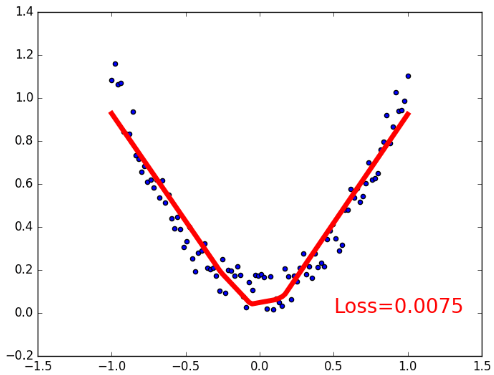

### 建立数据集
我们创建一些假数据来模拟真实的情况. 比如一个一元二次函数: y = a * x^2 + b, 我们给 y 数据加上一点噪声来更加真实的展示它.

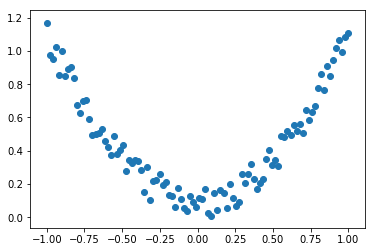

In [2]:
import torch
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

### 建立神经网络
建立一个神经网络我们可以直接运用 torch 中的体系. 先定义所有的层属性(__init__()), 然后再一层层搭建(forward(x))层于层的关系链接. 建立关系的时候, 我们会用到激励函数, 如果还不清楚激励函数用途的同学, 这里有非常好的一篇动画教程(https://mofanpy.com/tutorials/machine-learning/tensorflow/intro-activation-function ).

In [3]:
import torch
import torch.nn.functional as F     # 激励函数都在这

class Net(torch.nn.Module):  # 继承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()     # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):   # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.hidden(x))      # 激励函数(隐藏层的线性值)
        x = self.predict(x)             # 输出值
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)

print(net)  # net 的结构
"""
Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)
"""

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


'\nNet (\n  (hidden): Linear (1 -> 10)\n  (predict): Linear (10 -> 1)\n)\n'

### 训练网络
训练的步骤很简单, 如下:

In [5]:
# optimizer 是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = torch.nn.MSELoss()      # 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    prediction = net(x)     # 喂给 net 训练数据 x, 输出预测值

    loss = loss_func(prediction, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上

###可视化训练过程
为了可视化整个训练的过程, 更好的理解是如何训练, 我们如下操作: 

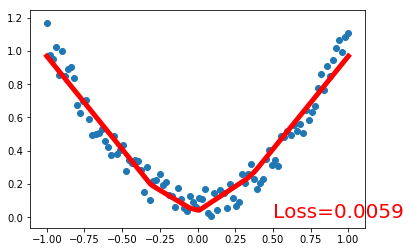

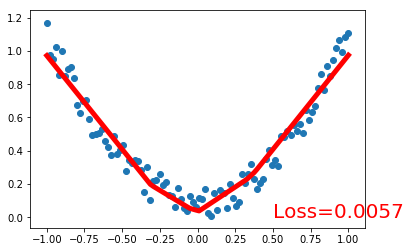

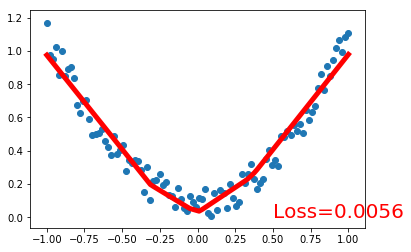

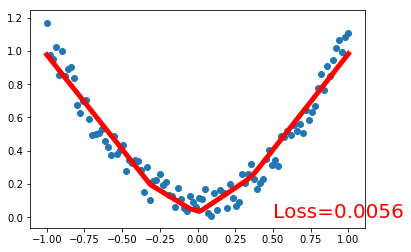

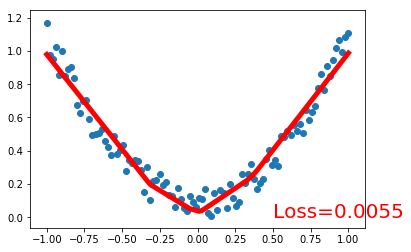

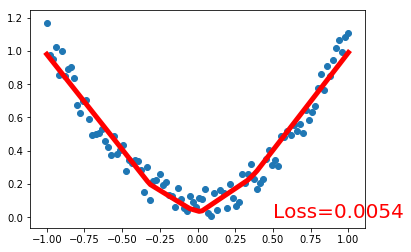

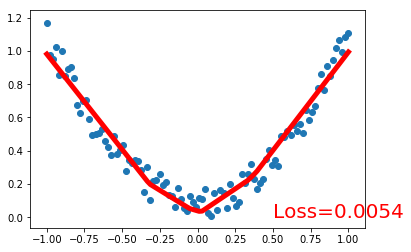

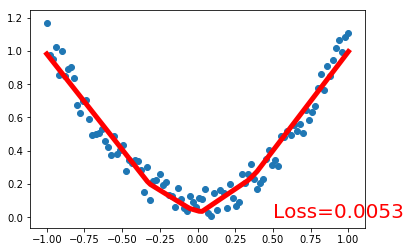

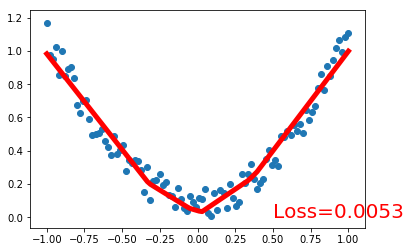

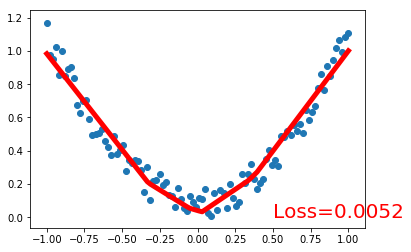

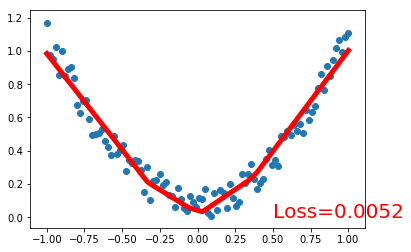

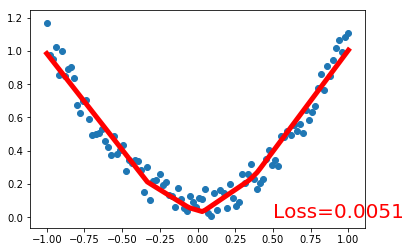

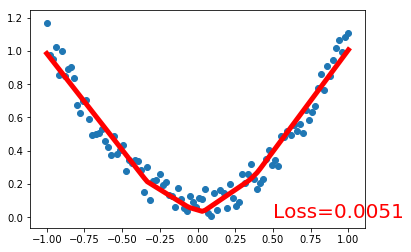

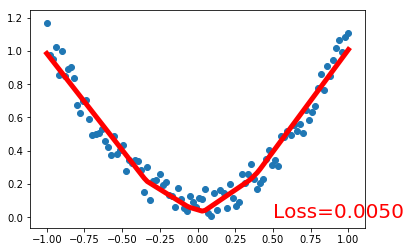

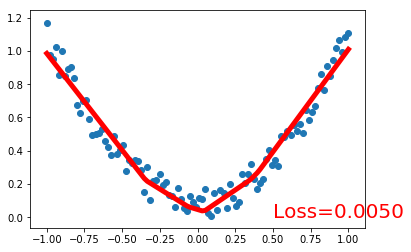

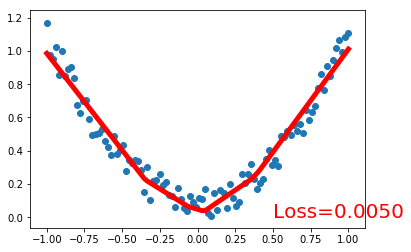

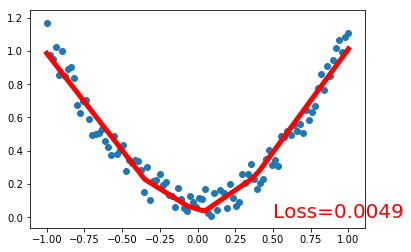

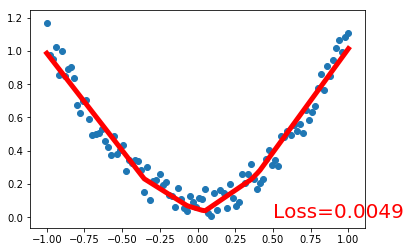

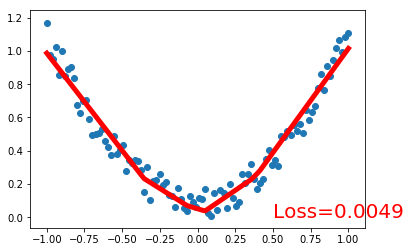

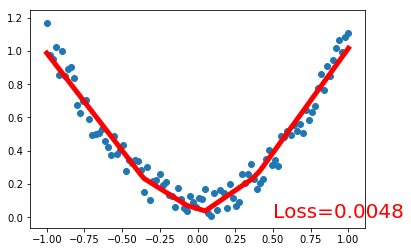

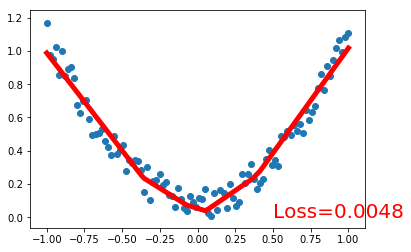

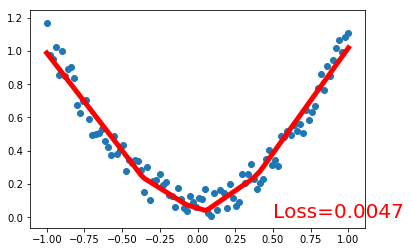

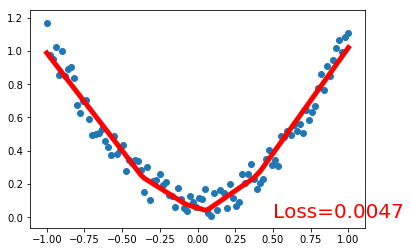

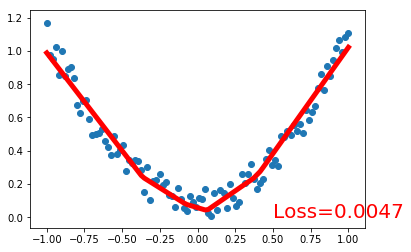

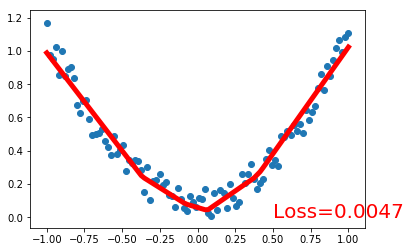

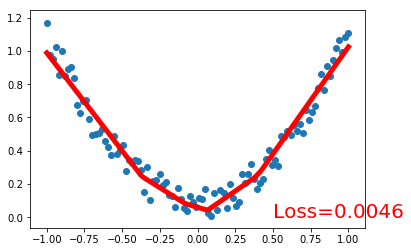

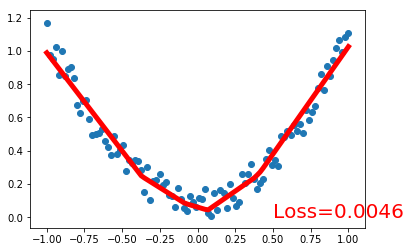

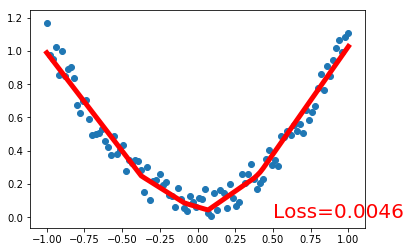

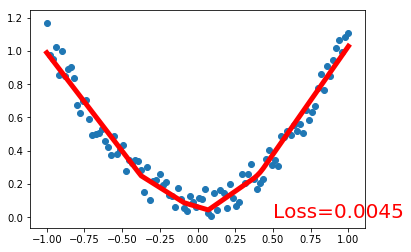

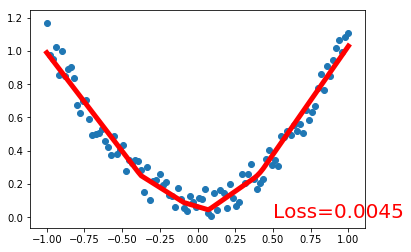

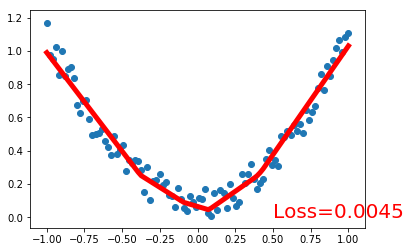

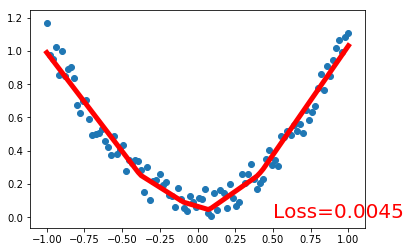

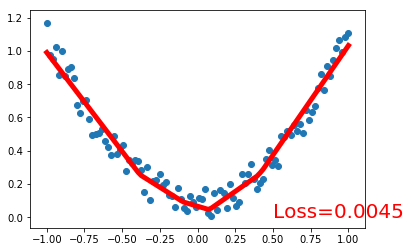

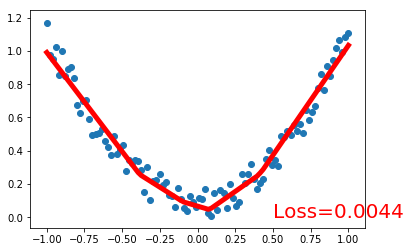

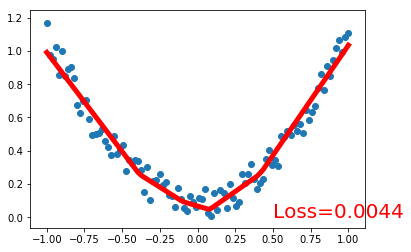

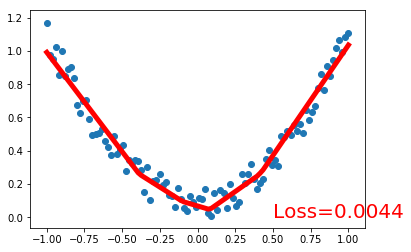

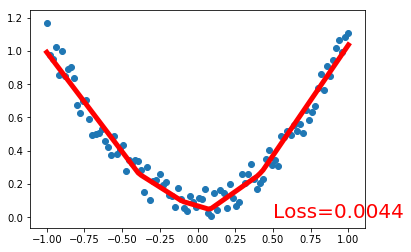

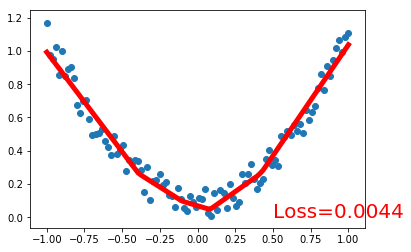

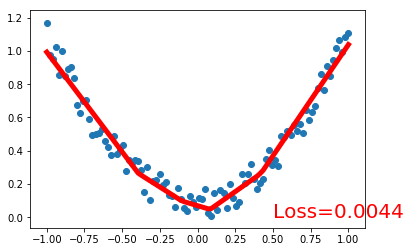

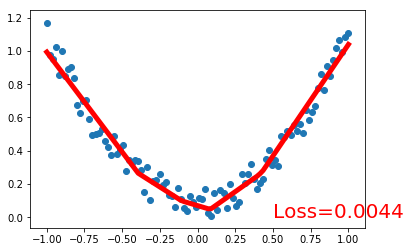

In [7]:
import matplotlib.pyplot as plt

plt.ion()   # 画图
plt.show()

for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

所以这也就是在我 github 代码(https://github.com/MorvanZhou/PyTorch-Tutorial/blob/master/tutorial-contents/301_regression.py )中的每一步的意义啦.